# 이변량분석 (연속형 -> 연속형)
* 연속형 : (숫자형 또는 수치형)

## 시각화 : Scatter (산점도)
- 점을 찍어서 그래프를 그린 모습
- 두 숫자형 변수의 관계를 나타내는 그래프
- 숫자형 변수들을 비교할 때 중요한 관점은 바로 직선이다. 직선이 잘 그려질 수록 강한 관계라고 볼 수 있다.
- 문법 : 
    - matplotlib : 
        - plt.scatter(df['변수'], df['변수'])
        - plt.scatter('x변수', 'y변수', data = df)
    - seaborn : 
        - sns.scatterplot(x = 'x변수', y = 'y변수' data = df)
        - sns.regplot(x = 'x변수', y = 'y변수' data = df) : 직선을 scatterplot에 그어줌
    - sns.pairplot(df) : 숫자형 변수들에 대한 산점도를 한번에 그려줌, but 변수와 데이터가 많으면 시간이 오래 걸리고 확인하기 어려움

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
titanicdata = sns.load_dataset('titanic')
titanicdata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
taxidata = sns.load_dataset('taxis')
taxidata.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


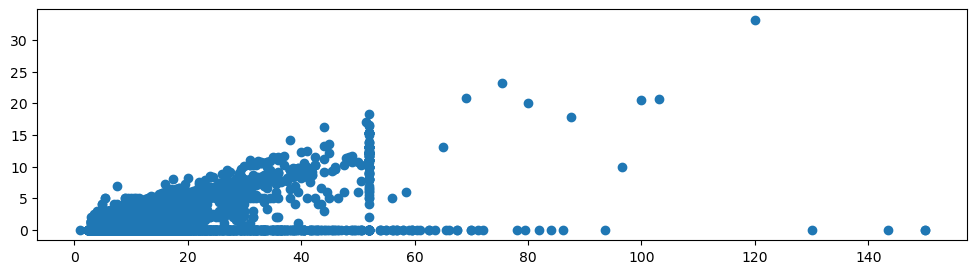

In [19]:
# plt.scatter
plt.figure(figsize = (12, 3))
plt.scatter(taxidata['fare'], taxidata['tip'])
plt.show()

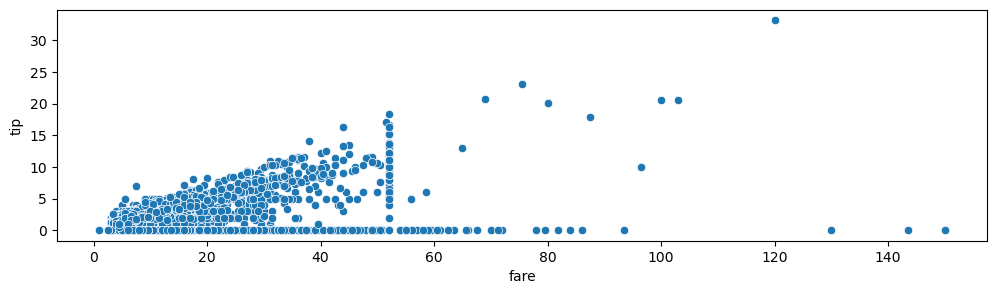

In [18]:
# sns.scatterplot
plt.figure(figsize = (12, 3))
sns.scatterplot(x = 'fare', y = 'tip', data = taxidata)
plt.show()

## 수치화 : 상관분석
관계를 숫자로 계산해서 비교하는 방법  
- 상관계수 : 관계를 수치화
    - 상관계수는 'r'로 표시
    - 상관계수끼리 비교 가능
    - -1, 1에 가까울 수록 강한 상관관계를 나타냄
        * 강한 : 0.5 < |𝑟| ≤ 1
        * 중간 : 0.2 < |𝑟| ≤ 0.5
        * 약한 : 0.1 < |𝑟| ≤ 0.2
        * (거의)없음 : |𝑟| ≤ 0.1
    - ※ 해당 수치는 대략적인 기준으로 절대적인 기준이 아님
- 상관분석 : 상관계수가 유의미한지 검정
    - p-value : 관계를 수치화 한 값( ex) 상관계수)이 유의미한지 판단하는 숫자
    - p-value < 0.05이면 두 변수 간에 관계가 있다, p-value >= 0.05 이면 관계가 없다고 본다. 
    - ※ 해당 수치는 대략적인 기준으로 절대적인 기준이 아님
- 문법 : 
    - scipy.stats 모듈 사용 : spst.pearsonr()
    - NaN이 있으면 계산되지 않는다. 따라서 결측치를 제거(.notnull()) 후 계산해야 한다.
    - 결과로는 (상관계수, p-value)로 튜플형태로 출력된다.
- df.corr() : 모든 숫자형 변수들 상호간의 상관계수를 계산해 준다.

In [20]:
import scipy.stats as spst

In [23]:
# 상관계수, p-value
spst.pearsonr(taxidata['fare'], taxidata['tip'])

PearsonRResult(statistic=0.48861240047218335, pvalue=0.0)

In [24]:
taxidata.corr()

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000
